# BIA 6304 Predictive Models Fall 2017
## Assignment 1 
## Notebook 4
### Stuent:  Leonardo Ji
### 10/30/2017

### Import Standard packages

In [1]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 15000) #important for getting all the text
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

### Start to think about automating your code. You should be able to use 98% of the above code and run a second data set through it.

Hence I would take your Notebook 3 and “make a copy”. Start with that. Also, think about starting a code notebook. 
For Notebook 4, repeat all the steps in Notebook 3 using the Prostate data set. The target is LPSA (log PSA test results). More info on the variables can be found here.
https://rafalab.github.io/pages/649/prostate.html
You will find a prostate.csv file in the BB folder. 

### Import Data and set Column names

In [2]:
cd C:\\Users\\lj015625\\Desktop\\Predictive Model\\Pred_Models_git\\Week 2

C:\Users\lj015625\Desktop\Predictive Model\Pred_Models_git\Week 2


In [3]:
dataset = pd.read_csv("data/prostate.csv", sep=",", encoding = 'utf8')
print(dataset.shape)
print(dataset.columns)
dataset.head()

(97, 10)
Index(['Obs', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45', 'lpsa'],
      dtype='object')


,Obs,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [4]:
h

Obs          int64
lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
dtype: object

In [5]:
# designate target variable name is log(prostate specific antigen)
targetName = 'lpsa'
targetSeries = dataset[targetName]
#remove target from current location and insert in collum 0
del dataset[targetName]
dataset.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
dataset.head()

,lpsa,Obs,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.430783,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.162519,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.162519,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-0.162519,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.371564,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0


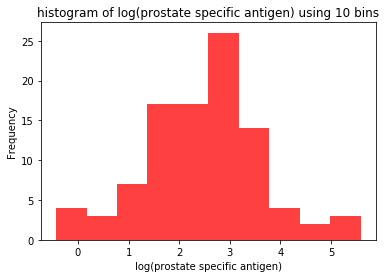

In [6]:
#histogram of log(prostate specific antigen) using 10 bins
n, bins, patches = plt.hist(dataset['lpsa'], 10, facecolor='red', alpha=0.75)
plt.title('histogram of log(prostate specific antigen) using 10 bins')
plt.xlabel("log(prostate specific antigen)")
plt.ylabel("Frequency")
plt.show()

### Clean Data

In [8]:
dataset.describe()

,lpsa,Obs,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,2.478387,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443
std,1.154329,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035
min,-0.430783,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
25%,1.731656,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000
50%,2.591516,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000
75%,3.056357,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000
max,5.582932,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000


In [10]:
#In a imported data set, you would break the data into two objects dataname.features (your PV) and dataname.target (your target/DV)
#There are a lot of ways to do this- here is one.
#View our .data and .target
dataset.target=targetSeries  
dataset.features=dataset.iloc[:, 1:]                        
print(dataset.target.shape)
print(dataset.features.shape)
print(dataset.features.columns)

(97,)
(97, 9)
Index(['Obs', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45'],
      dtype='object')


### Linear Regression - Ordinary Least Squares

In [11]:
# Linear Regression-Ordinary Least Squares
from sklearn.linear_model import LinearRegression

# fit a linear regression model to the data
model_LR = LinearRegression(normalize=True)
model_LR.fit(dataset.features, dataset.target)
print(model_LR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [12]:
# make predictions
expected_LR = dataset.target
predicted_LR = model_LR.predict(dataset.features)

In [13]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_LR, predicted_LR))
print("Mean Absolute Error:", mean_absolute_error(expected_LR, predicted_LR))
print("R2 Score:", r2_score(expected_LR, predicted_LR))
print("Explained Variance Score:", explained_variance_score(expected_LR, predicted_LR))
print("Score:", model_LR.score(dataset.features, dataset.target))
print("Coef:", model_LR.intercept_, model_LR.coef_)

Mean Squared Error: 0.0956507368481
Mean Absolute Error: 0.229512332004
R2 Score: 0.927468016886
Explained Variance Score: 0.927468016886
Score: 0.927468016886
Coef: 1.07026930612 [ 0.0354051   0.11342688  0.030487   -0.00644175  0.03672821  0.06457229
  0.01565418 -0.02577244 -0.00081676]


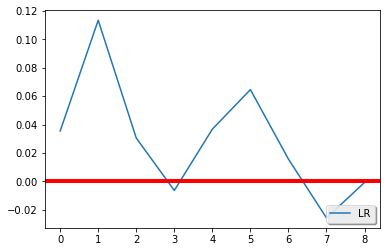

In [14]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [15]:
from sklearn.cross_validation import train_test_split

X = dataset.features
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
model_LR.fit(X_train, y_train)
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

In [17]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_LR.score(dataset.features, dataset.target),
        model_LR.score(dataset.features, dataset.target)))

MSE train: 0.086, test: 0.134
MSE train: 0.206, test: 0.279
R2 train: 0.930, test: 0.912
EVS train: 0.930, test: 0.914
Score train: 0.924, test: 0.924


In [18]:
scores = cross_val_score(model_LR, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean() 

Cross Validation Score for each K [ 0.89429521  0.83005612  0.95197232  0.77815274  0.94589605  0.93673892
  0.72400751  0.79753743  0.92571727  0.94612212]


0.87304956931727884

### Ridge Regression

In [19]:
from sklearn.linear_model import Ridge

# fit a ridge regression model to the data
model_RG = Ridge()

#### Grid Search on Ridge Regression model
Grid search tries different alpha parameters in this case from 0.05 to 2 and cross validation to find best accuracy score.
In this case it found alpha = 2 had the best accuracy score from rank_test_score list.  The bigger alpha means more penalty, we tries to find balance between variance and bias.  

In [38]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [.01,.1, .5, 1, 2, 5, 10, 20, 50, 100]}
#param_grid={"alpha": [1,10,1]} this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} this does a range 1 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(model_RG, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(dataset.features, dataset.target)
print("Grid Scores:", grid_search.cv_results_)
print("Best:", grid_search.best_params_)  

Grid Scores: {'split0_test_score': array([ 0.34467201,  0.34524192,  0.34758683,  0.35014252,  0.35427941,
        0.36192872,  0.36748258,  0.37023911,  0.36722429,  0.36022628]), 'split1_test_score': array([-1.22449438, -1.21582333, -1.18038702, -1.1420786 , -1.08017878,
       -0.96084339, -0.85516498, -0.75463282, -0.66194948, -0.64119098]), 'split2_test_score': array([-0.71939704, -0.71559747, -0.69914365, -0.67952602, -0.64317306,
       -0.55251843, -0.44168343, -0.29624038, -0.07625682,  0.07541332]), 'split3_test_score': array([-2.51681181, -2.5118665 , -2.49242338, -2.47279294, -2.44415117,
       -2.40007589, -2.37441204, -2.36375527, -2.37442516, -2.39580438]), 'split4_test_score': array([ 0.26460678,  0.26705351,  0.27671757,  0.28660511,  0.3015002 ,
        0.32710907,  0.34701205,  0.36373117,  0.37679847,  0.37842693]), 'mean_test_score': array([-0.76347306, -0.75937553, -0.74266127, -0.72461118, -0.69534685,
       -0.63775787, -0.58418797, -0.5290402 , -0.46699269, -

In [39]:
# fit a ridge regression model to the data
model_RG = Ridge(alpha=100)
model_RG.fit(dataset.features, dataset.target)
print(model_RG)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [40]:
# make predictions
expected_RG = dataset.target
predicted_RG= model_RG.predict(dataset.features)

In [41]:
print("Mean Squared Error:", mean_squared_error(expected_RG, predicted_RG))
print("Mean Absolute Error:", mean_absolute_error(expected_RG, predicted_RG))
print("R2 Score:", r2_score(expected_RG, predicted_RG))
print("Explained Variance Score:", explained_variance_score(expected_RG, predicted_RG))
print("Score:", model_RG.score(dataset.features, dataset.target))
print("Coef:", model_RG.intercept_, model_RG.coef_)

Mean Squared Error: 0.0993401353122
Mean Absolute Error: 0.229138544231
R2 Score: 0.924670344898
Explained Variance Score: 0.924670344898
Score: 0.924670344898
Coef: [ 0.8569922] [[ 0.03779291  0.04104007  0.00494047 -0.00408275  0.01849965  0.00682849
   0.0249151  -0.00267212 -0.0009788 ]]


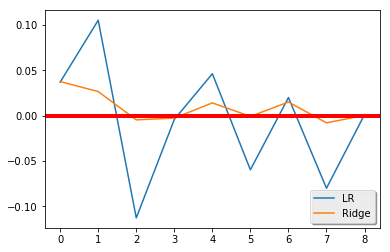

In [44]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [45]:
model_RG.fit(X_train, y_train)
y_train_pred = model_RG.predict(X_train)
y_test_pred = model_RG.predict(X_test)
scores = cross_val_score(model_RG, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean()  

Cross Validation Score for each K [ 0.94801679  0.84311601  0.96597443  0.79481207  0.96463792  0.93069068
  0.73439456  0.8183831   0.91363387  0.94570021]


0.88593596361470672

In [46]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_RG.score(dataset.features, dataset.target),
        model_RG.score(dataset.features, dataset.target)))

MSE train: 0.091, test: 0.129
MSE train: 0.214, test: 0.253
R2 train: 0.926, test: 0.915
EVS train: 0.926, test: 0.917
Score train: 0.922, test: 0.922


### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
model_LAS = Lasso()

#### Grid Search on Lasso

In [49]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [.01,.1, .5, 1, 2, 5, 10, 20, 50, 100]}
#param_grid={"alpha": [1,10,1]} this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} this does a range 1 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(model_LAS, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(dataset.features, dataset.target)
print("Grid Scores:", grid_search.cv_results_)
print("Best:", grid_search.best_params_)  

Grid Scores: {'split0_test_score': array([ 0.36390897,  0.35205785,  0.32787587,  0.2487065 ,  0.05490809,
       -0.81016452, -3.19754342, -9.5317962 , -9.5317962 , -9.5317962 ]), 'split1_test_score': array([ -0.77525676,  -0.75422771,  -0.53558795,  -0.36398415,
        -0.05171141,   0.63762784,   0.96159672,  -1.48395253,
       -13.07095892, -13.07095892]), 'split2_test_score': array([-0.28978784,  0.34152336,  0.44677955,  0.45540261,  0.47063065,
        0.50017022,  0.49558759,  0.28461517, -0.77939493, -0.77939493]), 'split3_test_score': array([ -2.28881278,  -2.41754513,  -2.1967246 ,  -1.9275252 ,
        -1.42670006,  -0.22481405,   0.77636463,  -0.97864549,
       -12.73813202, -12.73813202]), 'split4_test_score': array([ 0.37529531,  0.37829502,  0.33632833,  0.27444181,  0.11924156,
       -0.59777687, -2.63086653, -8.76356664, -8.76356664, -8.76356664]), 'mean_test_score': array([-0.51638924, -0.41546603, -0.31972123, -0.25836585, -0.16325562,
       -0.09872914, -0.727

In [50]:
model_LAS = Lasso(alpha=5)
model_LAS.fit(dataset.features, dataset.target)
print(model_LAS)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [51]:
# make predictions
expected_LAS = dataset.target
predicted_LAS = model_LR.predict(dataset.features)

In [52]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_LAS, predicted_LAS))
print("Mean Absolute Error:", mean_absolute_error(expected_LAS, predicted_LAS))
print("R2 Score:", r2_score(expected_LAS, predicted_LAS))
print("Explained Variance Score:", explained_variance_score(expected_LAS, predicted_LAS))
print("Score:", model_LAS.score(dataset.features, dataset.target))
print("Coef:", model_LAS.intercept_, model_LAS.coef_)

Mean Squared Error: 0.100689006218
Mean Absolute Error: 0.228934177724
R2 Score: 0.923647495676
Explained Variance Score: 0.923933015562
Score: 0.893803597667
Coef: [ 0.86542462] [ 0.0329176  0.         0.         0.         0.         0.         0.         0.
  0.       ]


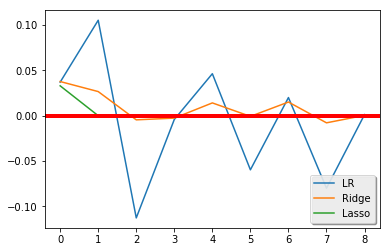

In [56]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [57]:
model_LAS.fit(X_train, y_train)
y_train_pred = model_LAS.predict(X_train)
y_test_pred = model_LAS.predict(X_test)
scores = cross_val_score(model_LAS, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean()  

Cross Validation Score for each K [ 0.96280268  0.80294147  0.91185558  0.70357527  0.99363013  0.99533889
  0.57334772  0.93576095  0.98693871  0.90096746]


0.87671588561527347

In [58]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_LAS.score(dataset.features, dataset.target),
        model_LAS.score(dataset.features, dataset.target)))

MSE train: 0.130, test: 0.190
MSE train: 0.172, test: 0.207
R2 train: 0.894, test: 0.875
EVS train: 0.894, test: 0.878
Score train: 0.888, test: 0.888


### ElasticNet Regression

In [59]:
from sklearn.linear_model import ElasticNet
model_EN = ElasticNet()

#### Grid Search on ElasticNet

In [60]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [.01,.1, .5, 1, 2, 5, 10, 20, 50, 100]}
#param_grid={"alpha": [1,10,1]} this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} this does a range 1 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(model_EN, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(dataset.features, dataset.target)
print("Grid Scores:", grid_search.cv_results_)
print("Best:", grid_search.best_params_)  

Grid Scores: {'split0_test_score': array([ 0.35719662,  0.35025829,  0.35142282,  0.32526733,  0.24281489,
       -0.07875086, -0.85757515, -3.29337668, -9.5317962 , -9.5317962 ]), 'split1_test_score': array([ -0.95418881,  -0.71713959,  -0.62659756,  -0.52853154,
        -0.35091051,   0.11423536,   0.66605967,   0.94889827,
        -4.44246044, -13.07095892]), 'split2_test_score': array([-0.48470061,  0.18488316,  0.4138965 ,  0.44712687,  0.45603516,
        0.47837399,  0.50111949,  0.49328102,  0.06226773, -0.77939493]), 'split3_test_score': array([ -2.35459801,  -2.35305187,  -2.33028055,  -2.18558866,
        -1.90660896,  -1.15246723,  -0.1686773 ,   0.7959587 ,
        -3.92644824, -12.73813202]), 'split4_test_score': array([ 0.33318638,  0.38424967,  0.36240066,  0.33427719,  0.26970825,
        0.01001549, -0.63887907, -2.71864563, -8.76356664, -8.76356664]), 'mean_test_score': array([-0.61397914, -0.42507307, -0.36112556, -0.31695662, -0.25359132,
       -0.12276069, -0.099

In [61]:
model_EN = ElasticNet(alpha=10)
model_EN.fit(dataset.features, dataset.target)
print(model_EN)

ElasticNet(alpha=10, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [62]:
# make predictions
expected_EN = dataset.target
predicted_EN = model_EN.predict(dataset.features)

In [63]:
print("Mean Squared Error:", mean_squared_error(expected_EN, predicted_EN))
print("Mean Absolute Error:", mean_absolute_error(expected_EN, predicted_EN))
print("R2 Score:", r2_score(expected_EN, predicted_EN))
print("Explained Variance Score:", explained_variance_score(expected_EN, predicted_EN))
print("Score:", model_EN.score(dataset.features, dataset.target))
print("Coef:", model_EN.intercept_, model_EN.coef_)

Mean Squared Error: 0.142165459803
Mean Absolute Error: 0.18667690288
R2 Score: 0.892195888191
Explained Variance Score: 0.892195888191
Score: 0.892195888191
Coef: [ 0.87564618] [ 0.03270899  0.          0.          0.          0.          0.          0.
  0.          0.        ]


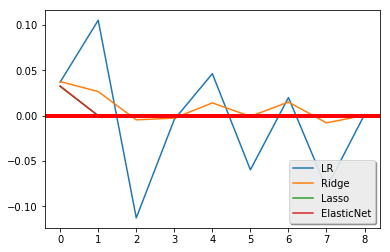

In [65]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.plot(model_EN.coef_, label='ElasticNet')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [66]:
model_EN.fit(X_train, y_train)
y_train_pred = model_EN.predict(X_train)
y_test_pred = model_EN.predict(X_test)
scores = cross_val_score(model_EN, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean() 

Cross Validation Score for each K [ 0.96154186  0.80039181  0.90860353  0.69904056  0.99333477  0.99607017
  0.56678042  0.93811371  0.98782657  0.89869085]


0.87503942444334792

In [67]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_EN.score(dataset.features, dataset.target),
        model_EN.score(dataset.features, dataset.target)))

MSE train: 0.132, test: 0.193
MSE train: 0.172, test: 0.207
R2 train: 0.893, test: 0.873
EVS train: 0.893, test: 0.876
Score train: 0.886, test: 0.886


### Least Angle Regression model

In [68]:
#LARS Regression Model- Least Angle Regression model
from sklearn.linear_model import Lars
model_LAR = Lars(n_nonzero_coefs=7)
model_LAR.fit(dataset.features, dataset.target)
print(model_LAR)

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=7, normalize=True, positive=False,
   precompute='auto', verbose=False)


In [69]:
# make predictions
expected_LAR = dataset.target
predicted_LAR = model_LAR.predict(dataset.features)

In [70]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_LAR, predicted_LAR))
print("Mean Absolute Error:", mean_absolute_error(expected_LAR, predicted_LAR))
print("R2 Score:", r2_score(expected_LAR, predicted_LAR))
print("Explained Variance Score:", explained_variance_score(expected_LAR, predicted_LAR))
print("Score:", model_LAR.score(dataset.features, dataset.target))
print("Coef:", model_LAR.intercept_, model_LAS.coef_)

Mean Squared Error: 0.0973193381741
Mean Absolute Error: 0.222857136629
R2 Score: 0.926202715988
Explained Variance Score: 0.926202715988
Score: 0.926202715988
Coef: [ 0.82607004] [ 0.03218035  0.          0.          0.          0.          0.          0.
  0.          0.        ]


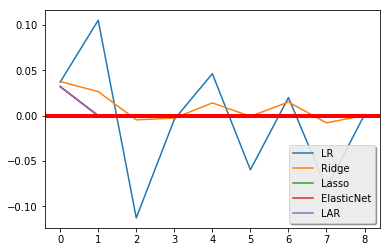

In [71]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.plot(model_EN.coef_, label='ElasticNet')
plt.plot(model_LAS.coef_, label='LAR')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [72]:
model_LAR.fit(X_train, y_train)
y_train_pred = model_LAR.predict(X_train)
y_test_pred = model_LAR.predict(X_test)
scores = cross_val_score(model_LAR, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean() 

Cross Validation Score for each K [ 0.92439103  0.85252385  0.95515964  0.78735293  0.96205252  0.93532173
  0.72523897  0.81313946  0.93656811  0.94680396]


0.88385522000718131

In [73]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_LAR.score(dataset.features, dataset.target),
        model_LAR.score(dataset.features, dataset.target)))

MSE train: 0.087, test: 0.123
MSE train: 0.204, test: 0.254
R2 train: 0.929, test: 0.919
EVS train: 0.929, test: 0.920
Score train: 0.925, test: 0.925


### Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
model_forest.fit(dataset.features, dataset.target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [21]:
expected_forest = dataset.target
predicted_forest = model_forest.predict(dataset.features)

In [22]:
# summarize the fit of the model
print("Mean Squared Error:", mean_squared_error(expected_forest, predicted_forest))
print("Mean Absolute Error:", mean_absolute_error(expected_forest, predicted_forest))
print("R2 Score:", r2_score(expected_forest, predicted_forest))
print("Explained Variance Score:", explained_variance_score(expected_forest, predicted_forest))
print("Score:", model_forest.score(dataset.features, dataset.target))

Mean Squared Error: 0.00234277522951
Mean Absolute Error: 0.0237085973206
R2 Score: 0.998223472824
Explained Variance Score: 0.998342784748
Score: 0.998223472824


In [23]:
model_forest.fit(X_train, y_train)
y_train_pred = model_forest.predict(X_train)
y_test_pred = model_forest.predict(X_test)
scores = cross_val_score(model_forest, X_train, y_train, cv=10)
print("Cross Validation Score for each K", scores)
scores.mean() 

Cross Validation Score for each K [ 0.99074401  0.97230111  0.94109885  0.9296507   0.98344919  0.99479462
  0.79954245  0.99005718  0.98342071  0.98866206]


0.95737208845046529

In [24]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('EVS train: %.3f, test: %.3f' % (
        explained_variance_score(y_train, y_train_pred),
        explained_variance_score(y_test, y_test_pred)))
print('Score train: %.3f, test: %.3f' % (
        model_forest.score(dataset.features, dataset.target),
        model_forest.score(dataset.features, dataset.target)))

MSE train: 0.005, test: 0.024
MSE train: 0.038, test: 0.073
R2 train: 0.996, test: 0.984
EVS train: 0.996, test: 0.984
Score train: 0.992, test: 0.992


### Summary

The random forest model has the highest cross validation accuracy score, smallest MSE and largest $R^2$.  
 Here are why:

* The Lasso, ElasticNet, and Least Angle Regression both reduced number of features.  The ridge Regression did not reduce the number of features.
* However, none of the models have cross validation within 2% of the mean.
* The grid search ran models with several alpha parameters with 5-fold cross validation. The bigger alpha means more penalty, we tries to find balance between variance and bias. 


                                   Table 1. Regression Models Results
| Regression | Parameters| Mean Squared Error| Mean Absolute Error| $R^2$ Score|Explained Variance Score|Score|10-fold CV Score|
| :---------:|:-----:|:------------------:|:------------------:|:-------:|:-----------------------:|:----:|------------------:|
| Linear Regression-OLS | normalize=True | 0.096 | 0.230 | 0.927 | 0.927 | 0.927 | 0.873  |   
| Ridge Regression      | alpha=100 | 0.099 | 0.229 | 0.925 | 0.925 | 0.925 | 0.886 |   
| Lasso Regression  | alpha=5 | 0.100 | 0.229 | 0.924 | 0.924 | 0.894 | 0.877 |
| ElasticNet Regression  | alpha=10 | 0.142 | 0.187 | 0.892 | 0.892 | 0.892 | 0.875 |
| Least Angle Regression | n_nonzero_coefs=7 | 0.097 | 0.223 | 0.926 | 0.926 | 0.926 | 0.884 |
| Random Forest Regressor | n_estimators=1000,criterion='mse'| 0.002 | 0.023 | 0.998 | 0.998 | 0.998 | 0.957 |

## END